# First Analysis
## Offshore and Onshore wind, 3 Hydro plants, no production in Belgium

In [1]:
from datetime import datetime

def is_leap_year(year):
    """Determine whether a year is a leap year."""
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

def sum_hours_over_years(start_year, end_year):
    """Calculate the sum of hours from start_year to end_year, inclusive."""
    total_hours = 0
    for year in range(start_year, end_year + 1):
        if is_leap_year(year):
            total_hours += 366 * 24  # Leap year has 366 days
        else:
            total_hours += 365 * 24  # Non-leap year has 365 days
    return total_hours

# Now, we will iterate over the years from 2015 to 2019 as per the requirement.
start_year = 2015
end_year = 2019
yearly_hours = {}

# Calculating the sum of hours for each range starting from 2015
for year in range(start_year, end_year + 1):
    yearly_hours[f"{start_year}-{year}"] = sum_hours_over_years(start_year, year)

yearly_hours

{'2015-2015': 8760,
 '2015-2016': 17544,
 '2015-2017': 26304,
 '2015-2018': 35064,
 '2015-2019': 43824}

In [2]:
from gboml import GbomlGraph

timehorizon = 17544


gboml_model = GbomlGraph(timehorizon=timehorizon)
nodes, edges, param = gboml_model.import_all_nodes_and_edges("../../models/hydro_wind/greenland_hydro-wind.gboml")
gboml_model.add_global_parameters(param)
gboml_model.add_nodes_in_model(*nodes)
gboml_model.add_hyperedges_in_model(*edges)
gboml_model.build_model()
solution, obj, status, solver_info, constr_info, _ = gboml_model.solve_gurobi(opt_file="gurobi.txt")
print("Solved")

Check variables of node LIQUEFIED_METHANE_CARRIERS_GR : --- 0.0 seconds ---
Check variables of node LIQUEFIED_METHANE_STORAGE_HUB_GR : --- 0.00034046173095703125 seconds ---
Check variables of node METHANE_LIQUEFACTION_PLANTS_GR : --- 0.0 seconds ---
Check variables of node METHANATION_PLANTS_GR : --- 0.0010137557983398438 seconds ---
Check variables of node WATER_STORAGE_GR : --- 0.0 seconds ---
Check variables of node CARBON_DIOXIDE_STORAGE_GR : --- 0.0010094642639160156 seconds ---
Check variables of node HYDROGEN_STORAGE_GR : --- 0.0 seconds ---
Check variables of node DIRECT_AIR_CAPTURE_PLANTS_GR : --- 0.0010018348693847656 seconds ---
Check variables of node DESALINATION_PLANTS_GR : --- 0.0 seconds ---
Check variables of node ELECTROLYSIS_PLANTS_GR : --- 0.0 seconds ---
Check variables of node HVDC_GR : --- 0.0 seconds ---
Check variables of node BATTERY_STORAGE_GR : --- 0.0017707347869873047 seconds ---
Check variables of node HYDRO_PLANT_05h_GR : --- 0.0 seconds ---
Check varia

  60   2.07357052e+03  2.07368041e+03  1.88e-06 4.33e-10  1.20e-07    49s
  61   2.07357056e+03  2.07368038e+03  1.89e-06 4.40e-10  1.20e-07    49s
  62   2.07357057e+03  2.07368027e+03  1.88e-06 4.40e-10  1.19e-07    50s
  63   2.07357058e+03  2.07368024e+03  1.89e-06 4.39e-10  1.19e-07    51s
  64   2.07357059e+03  2.07368018e+03  1.89e-06 4.38e-10  1.19e-07    51s
  65  -3.89863589e+13  2.64152080e+05  7.72e+08 3.95e+01  4.91e+08    52s
  66  -3.96010483e+12  8.66253453e+09  7.86e+07 1.06e+04  6.70e+07    53s
  67  -1.36056666e+12  3.22696694e+09  2.69e+07 5.33e+03  2.26e+07    54s
  68  -2.66727228e+11  1.15100554e+09  5.28e+06 1.22e+03  3.46e+06    54s
  69  -3.62454824e+10  7.11561308e+08  7.29e+05 7.27e+01  1.95e+05    55s
  70  -1.31918442e+10  5.40908752e+08  2.71e+05 2.23e+01  6.23e+04    56s
  71  -4.19186599e+09  3.13700020e+08  8.99e+04 5.10e+00  1.77e+04    56s
  72  -1.11764423e+09  7.12817562e+07  2.51e+04 2.97e-01  3.74e+03    57s
  73  -3.37633108e+07  8.67889860e+06 

In [3]:
import json

gathered_data = gboml_model.turn_solution_to_dictionary(solver_info, status, solution, obj, constr_info)
print("Json done")
with open(f'../../models/hydro_wind/results/RREH.json', "w") as fp:json.dump(gathered_data, fp, indent=4)

Json done


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class MakeMeReadable:
    def __init__(self, d):
        self.d = d
    
    def __dir__(self):
        return self.d.keys()
    
    def __getattr__(self, v):
        try:
            out = self.d[v]
            if isinstance(out, dict):
                return MakeMeReadable(out)
            return out
        except:
            return getattr(self.d, v)
        
    def __str__(self):
        return str(self.d)
    
    def __repr__(self):
        return repr(self.d)

In [22]:
dico1 = {}
with open('../../models/hydro_wind/results/hydro_wind_diff_17544_results.json', 'r') as f:
    dico1 = json.load(f)
            
d1 = MakeMeReadable(dico1)
    
if isinstance(dico1, dict):
    print('The data is a dictionary')
else:
    print('The data is not a dictionary')

The data is a dictionary


In [23]:
dico2 = {}
with open('../../models/hydro_wind/results/hydro_wind_diff_43800_results.json', 'r') as f:
    dico2 = json.load(f)
            
d2 = MakeMeReadable(dico2)
    
if isinstance(dico2, dict):
    print('The data is a dictionary')
else:
    print('The data is not a dictionary')

The data is a dictionary


In [24]:
ls_nodes1 = list(d1.model.nodes.keys())

print(ls_nodes1)

['LIQUEFIED_METHANE_CARRIERS_RREH', 'LIQUEFIED_METHANE_STORAGE_HUB_RREH', 'METHANE_LIQUEFACTION_PLANTS_RREH', 'METHANATION_PLANTS_RREH', 'WATER_STORAGE_RREH', 'CARBON_DIOXIDE_STORAGE_RREH', 'HYDROGEN_STORAGE_RREH', 'DIRECT_AIR_CAPTURE_PLANTS_RREH', 'DESALINATION_PLANTS_RREH', 'ELECTROLYSIS_PLANTS_RREH', 'HVDC_RREH', 'BATTERY_STORAGE_RREH', 'HYDRO_PLANT_05h_RREH', 'HYDRO_BASIN_05h_RREH', 'HYDRO_PLANT_03j_RREH', 'HYDRO_BASIN_03j_RREH', 'HYDRO_PLANT_03h_RREH', 'HYDRO_BASIN_03h_RREH', 'ON_WIND_PLANTS_RREH', 'OFF_WIND_PLANTS_RREH', 'ENERGY_DEMAND_BE', 'LIQUEFIED_METHANE_STORAGE_DESTINATION', 'LIQUEFIED_METHANE_REGASIFICATION']


In [25]:
ls_nodes2 = list(d2.model.nodes.keys())

print(ls_nodes2)

['LIQUEFIED_METHANE_CARRIERS_RREH', 'LIQUEFIED_METHANE_STORAGE_HUB_RREH', 'METHANE_LIQUEFACTION_PLANTS_RREH', 'METHANATION_PLANTS_RREH', 'WATER_STORAGE_RREH', 'CARBON_DIOXIDE_STORAGE_RREH', 'HYDROGEN_STORAGE_RREH', 'DIRECT_AIR_CAPTURE_PLANTS_RREH', 'DESALINATION_PLANTS_RREH', 'ELECTROLYSIS_PLANTS_RREH', 'HVDC_RREH', 'BATTERY_STORAGE_RREH', 'HYDRO_PLANT_05h_RREH', 'HYDRO_BASIN_05h_RREH', 'HYDRO_PLANT_03j_RREH', 'HYDRO_BASIN_03j_RREH', 'HYDRO_PLANT_03h_RREH', 'HYDRO_BASIN_03h_RREH', 'ON_WIND_PLANTS_RREH', 'OFF_WIND_PLANTS_RREH', 'ENERGY_DEMAND_BE', 'LIQUEFIED_METHANE_STORAGE_DESTINATION', 'LIQUEFIED_METHANE_REGASIFICATION']


In [26]:
def cost_rreh(ls:list):
    if len(ls) == 0:
        return 0.0

    cost = 0

    for ele in ls:
        # print(f"{ele = }")
        # print(dico["solution"]["elements"][ele]["objectives"])
        try:
            cost += np.sum(dico1["solution"]["elements"][ele]["objectives"]["unnamed"])
        except:
            for e in dico1["solution"]["elements"][ele]["objectives"]["named"].values():
                # print(f"{e = }")
                cost += e
        # print(f"{cost = }")
    
    return cost

In [27]:
import re 

excluded_hydro_basins = [node for node in ls_nodes1 if re.match(r'HYDRO_BASIN_[\w]+_RREH$', node)]

try:
    GR_nodes = [node for node in ls_nodes1 if node.endswith("_RREH") and node not in excluded_hydro_basins]
except:
    GR_nodes = []
BE_nodes = list(map(lambda string: string if string[-3:] == "_BE" or string in ["PCCC_CCGT", "PCCC", "CO2_EXPORT", "LIQUEFIED_METHANE_STORAGE_DESTINATION","LIQUEFIED_METHANE_REGASIFICATION"] else None, ls_nodes1))

try:
    GR_nodes = list(filter(lambda x: x not in [None, "PCCC", "PROD_CO2", "CO2_EXPORT"], GR_nodes))
except:
    GR_nodes = []
BE_nodes = list(filter(lambda x: x not in [None, "PROD_CO2"], BE_nodes))

cost_GR = cost_rreh(GR_nodes)
cost_BE = cost_rreh(BE_nodes)


print(f"GR {cost_GR = }")
print(f"BE {cost_BE = }")


obj_cost = d1.solution.objective
tot_cost = np.sum([cost_GR, cost_BE])

abs_diff = np.abs(d1.solution.objective - np.sum([cost_GR, cost_BE]))
print(f"{obj_cost = }")
print(f"{tot_cost = }")
print(abs_diff < 0.1)

GR cost_GR = 2493.1660142003525
BE cost_BE = 22.15540320959131
obj_cost = 2515.3214174086875
tot_cost = 2515.321417409944
True


In [28]:
def cost_rreh(ls:list):
    if len(ls) == 0:
        return 0.0

    cost = 0

    for ele in ls:
        # print(f"{ele = }")
        # print(dico["solution"]["elements"][ele]["objectives"])
        try:
            cost += np.sum(dico2["solution"]["elements"][ele]["objectives"]["unnamed"])
        except:
            for e in dico2["solution"]["elements"][ele]["objectives"]["named"].values():
                # print(f"{e = }")
                cost += e
        # print(f"{cost = }")
    
    return cost

In [29]:
import re 

excluded_hydro_basins = [node for node in ls_nodes2 if re.match(r'HYDRO_BASIN_[\w]+_RREH$', node)]

try:
    GR_nodes = [node for node in ls_nodes2 if node.endswith("_RREH") and node not in excluded_hydro_basins]
except:
    GR_nodes = []
BE_nodes = list(map(lambda string: string if string[-3:] == "_BE" or string in ["PCCC_CCGT", "PCCC", "CO2_EXPORT", "LIQUEFIED_METHANE_STORAGE_DESTINATION","LIQUEFIED_METHANE_REGASIFICATION"] else None, ls_nodes2))

try:
    GR_nodes = list(filter(lambda x: x not in [None, "PCCC", "PROD_CO2", "CO2_EXPORT"], GR_nodes))
except:
    GR_nodes = []
BE_nodes = list(filter(lambda x: x not in [None, "PROD_CO2"], BE_nodes))

cost_GR = cost_rreh(GR_nodes)
cost_BE = cost_rreh(BE_nodes)


print(f"GR {cost_GR = }")
print(f"BE {cost_BE = }")


obj_cost = d2.solution.objective
tot_cost = np.sum([cost_GR, cost_BE])

abs_diff = np.abs(d2.solution.objective - np.sum([cost_GR, cost_BE]))
print(f"{obj_cost = }")
print(f"{tot_cost = }")
print(abs_diff < 0.1)

GR cost_GR = 6715.9897899646
BE cost_BE = 53.46276148688831
obj_cost = 6769.4525514404695
tot_cost = 6769.452551451489
True


In [30]:
# Initialize a dictionary to hold individual capacities
plant_capacities = {}

# Store wind capacities individually and add them to the total capacity
plant_capacities['wind_onshore_gr'] = d1.solution.elements.ON_WIND_PLANTS_RREH.variables.capacity.values[0]
plant_capacities['wind_off_gr'] = d1.solution.elements.OFF_WIND_PLANTS_RREH.variables.capacity.values[0]

# Dynamically identify HYDRO_PLANT capacities and store them
for element_name in ls_nodes1:
    if re.match(r'HYDRO_PLANT_\w+_RREH$', element_name):
        # Extract capacity and store it in the dictionary
        plant_capacities[element_name] = dico1["solution"]["elements"][element_name]["variables"]["capacity"]["values"][0]

# Compute the total installed capacity by summing all individual capacities
total_installed_capacity = sum(plant_capacities.values())

Installed capacity of onshore = 3.760 GW
Installed capacity of offshore = 0.784 GW
Installed capacity of hydro = 0.058 GW
Installed capacity of hydro = 0.099 GW
Installed capacity of hydro = 0.040 GW

Total installed capacity = 4.741 GW


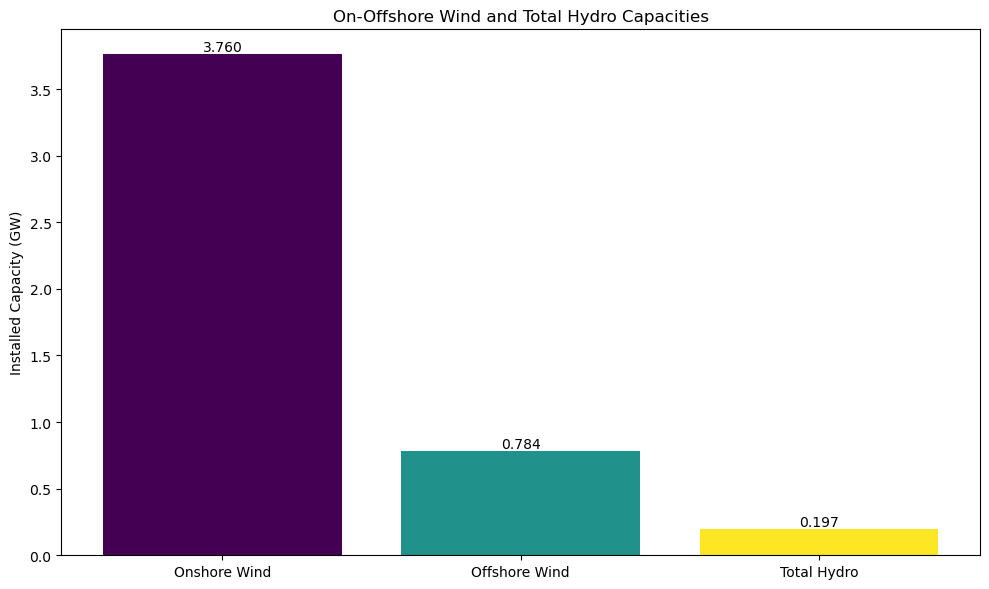

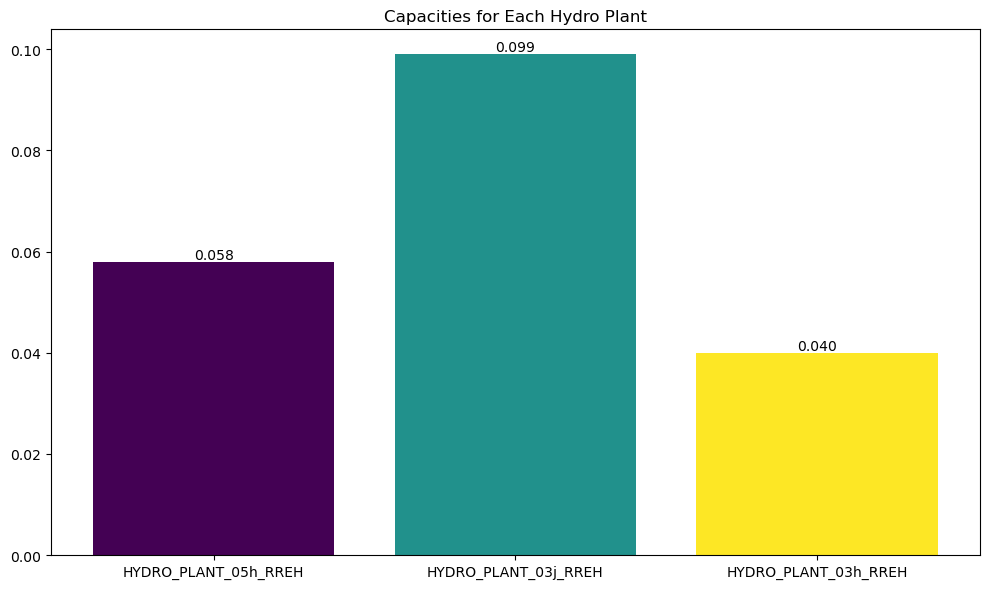

In [31]:
# Doesn't install on/offshore wind turbines if 1,7GW of Hydro

import matplotlib.pyplot as plt
import numpy as np

# Print installed capacities
for plant, capacity in plant_capacities.items():
    plant_type = "hydro" if "HYDRO_PLANT" in plant else "onshore" if "onshore" in plant else "offshore"
    print(f"Installed capacity of {plant_type} = {capacity:.3f} GW")

# Calculate the total installed capacity
total_installed_capacity = sum(plant_capacities.values())

print(f"\nTotal installed capacity = {total_installed_capacity:.3f} GW")

# Calculate total hydro capacity by summing all hydro plant capacities
total_hydro_capacity = sum(capacity for plant, capacity in plant_capacities.items() if "HYDRO_PLANT" in plant)

# Data for the first plot
categories = ['Onshore Wind', 'Offshore Wind', 'Total Hydro']
capacities = [
    plant_capacities.get('wind_onshore_gr', 0),
    plant_capacities.get('wind_off_gr', 0),
    total_hydro_capacity
]

### Plot 1: Combined Wind and Total Hydro Capacities
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))
plt.bar(categories, capacities, color=colors)
plt.ylabel('Installed Capacity (GW)')
plt.title('On-Offshore Wind and Total Hydro Capacities')
# Annotate each bar with its capacity
for i, v in enumerate(capacities):
    plt.text(i, v, f"{v:.3f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Plot 2: Capacities for Each Hydro Plant Separately
plt.figure(figsize=(10, 6))
hydro_labels = [plant for plant in plant_capacities.keys() if "HYDRO_PLANT" in plant]
hydro_values = [capacity for plant, capacity in plant_capacities.items() if "HYDRO_PLANT" in plant]
colors = plt.cm.viridis(np.linspace(0, 1, len(hydro_labels)))
plt.bar(hydro_labels, hydro_values, color=colors)
plt.title('Capacities for Each Hydro Plant')
# plt.xticks(rotation=45)
# Annotate each hydro plant bar with its capacity
for i, v in enumerate(hydro_values):
    plt.text(i, v, f"{v:.3f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [13]:
gas_demand = d.model.hyperedges.DESTINATION_METHANE_BALANCE.parameters.demand
gas_demand = np.sum(gas_demand[:timehorizon])/1000
print("the gas demand is ", gas_demand, "TWh")

the gas demand is  1.2970272171668917 TWh


In [14]:
# LCH4 full production:
gas = np.array(d.solution.elements.LIQUEFIED_METHANE_REGASIFICATION.variables.methane.values) * 15.31 # kt/h * GWh/kt
gas_prod = np.sum(gas) # GWh
gas_prod/1000

12.970272171668919

In [15]:
demand_in_mwh = gas_prod * 1e3  # Convert TWh to MWh
total_cost_in_euros = tot_cost * 1e6  # Convert million euros to euros

# Compute price per MWh in euros
price_per_mwh = total_cost_in_euros / demand_in_mwh

print(f"The price is {round(price_per_mwh, 3)} €/MWh \n")
print("In February 2024, the natural gas price is between 40.2 and 51.5 €/MWh")  # Adjusted to €/MWh
print("This system is about", round((price_per_mwh / 45), 3), "times more expensive compared to a reference price of 45 €/MWh")

The price is 159.882 €/MWh 

In February 2024, the natural gas price is between 40.2 and 51.5 €/MWh
This system is about 3.553 times more expensive compared to a reference price of 45 €/MWh


In [16]:
def cost_rreh_detailed(ls):
    detailed_cost = {}
    if len(ls) == 0:
        return detailed_cost

    for ele in ls:
        node_cost = 0
        try:
            node_cost += np.sum(dico["solution"]["elements"][ele]["objectives"]["unnamed"])
        except:
            for e in dico["solution"]["elements"][ele]["objectives"]["named"].values():
                node_cost += e
        detailed_cost[ele] = node_cost
    
    return detailed_cost


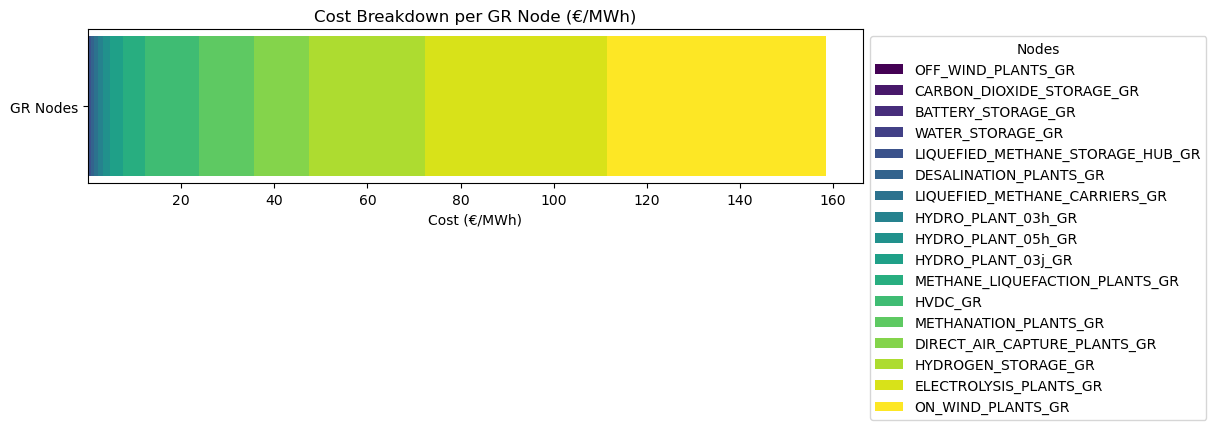

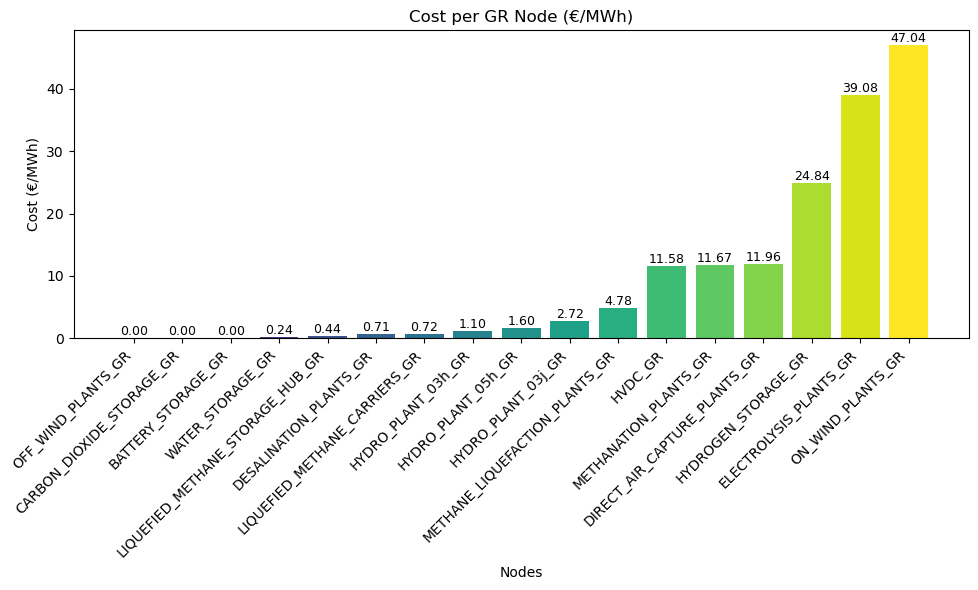

In [17]:
import matplotlib.pyplot as plt
import numpy as np

cost_details_GR = cost_rreh_detailed(GR_nodes)

sorted_nodes_and_costs = sorted(cost_details_GR.items(), key=lambda item: item[1])
sorted_nodes = [item[0] for item in sorted_nodes_and_costs]
sorted_costs = [item[1] for item in sorted_nodes_and_costs]

# Convert costs to €/MWh
adjusted_costs = [cost *1e6 / demand_in_mwh for cost in sorted_costs]

# Generate colors - ensuring consistent colors across plots
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_nodes)))

# Plot 1: Stacked Horizontal Bar Chart
plt.figure(figsize=(10, 2))
cumulative_cost = 0  # Start at 0 for the leftmost bar segment

for node, cost, color in zip(sorted_nodes, adjusted_costs, colors):
    plt.barh('GR Nodes', cost, left=cumulative_cost, color=color, label=node)
    cumulative_cost += cost

plt.xlabel('Cost (€/MWh)')
plt.title('Cost Breakdown per GR Node (€/MWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Nodes')
plt.show()

# Plot 2: Vertical Bar Chart with Sorted Nodes
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_nodes, adjusted_costs, color=colors)

plt.xlabel('Nodes')
plt.ylabel('Cost (€/MWh)')
plt.title('Cost per GR Node (€/MWh)')
plt.xticks(rotation=45, ha="right")

# Adding the cost above each bar
for bar, cost in zip(bars, adjusted_costs):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{cost:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_production_dynamics(offshore_wind_gr, onshore_wind_gr, hydro_gr1, hydro_gr2, hydro_gr3, start_date='2015-01-01'):
    # Create date range for the datasets
    date_range = pd.date_range(start=start_date, periods=len(offshore_wind_gr), freq='H')

    # Create DataFrames
    offshore_wind_df_gr = pd.DataFrame(offshore_wind_gr, index=date_range, columns=['Elec'])
    onshore_wind_df_gr = pd.DataFrame(onshore_wind_gr, index=date_range, columns=['Elec'])
    hydro_df1_gr = pd.DataFrame(hydro_gr1, index=date_range, columns=['Elec'])
    hydro_df2_gr = pd.DataFrame(hydro_gr2, index=date_range, columns=['Elec']) 
    hydro_df3_gr = pd.DataFrame(hydro_gr3, index=date_range, columns=['Elec']) 

   
    # Smooth the data with a rolling mean
    offshore_wind_df_gr['Smoothed'] = offshore_wind_df_gr['Elec'].rolling(window=24).mean()
    onshore_wind_df_gr['Smoothed'] = onshore_wind_df_gr['Elec'].rolling(window=24).mean()
    hydro_df1_gr['Smoothed'] = hydro_df1_gr['Elec'].rolling(window=24).mean()
    hydro_df2_gr['Smoothed'] = hydro_df2_gr['Elec'].rolling(window=24).mean()
    hydro_df3_gr['Smoothed'] = hydro_df3_gr['Elec'].rolling(window=24).mean() 
   
    # Plotting
    fig, axs = plt.subplots(5, 1, figsize=(12, 8), sharex=True)

    colors = plt.cm.viridis(np.linspace(0, 1, 5))

    # Plot each storage type
    for ax, df, color, label in zip(axs,
                                    [offshore_wind_df_gr, onshore_wind_df_gr, hydro_df1_gr, hydro_df2_gr, hydro_df3_gr],
                                    colors,
                                    ['Offshore Wind Production (Greenland)', 'Onshore Wind Production (Greenland)', 'Hydro Production 03h (Greenland)', 'Hydro Production 03j (Greenland)', 'Hydro Production 05h (Greenland)']):
        ax.fill_between(df.index, df['Smoothed'], color=color)
        ax.set_title(label, fontsize=10, loc='left')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.set_ylabel('GWh')

    # Adjust layout and show plot
    fig.tight_layout()
    plt.show()

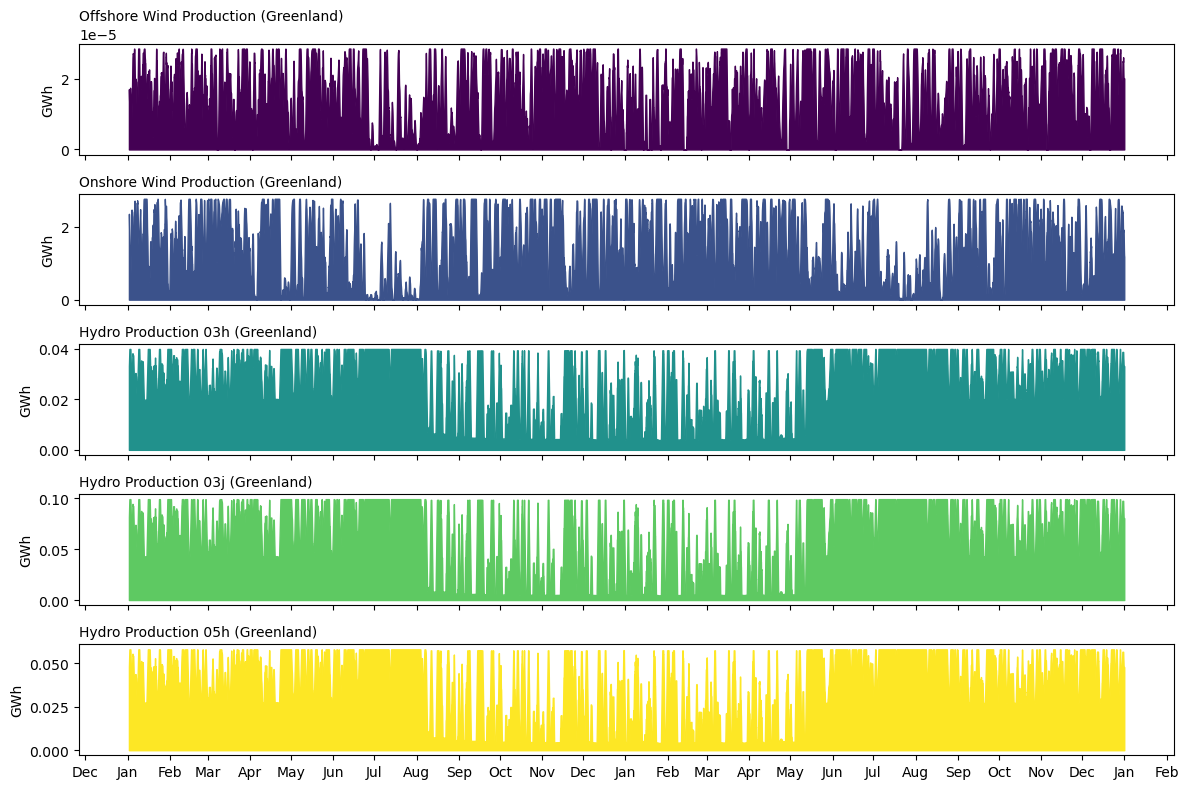

In [19]:
offshore_prod_gr = np.array(d.solution.elements.OFF_WIND_PLANTS_GR.variables.electricity.values)
onshore_prod_gr = np.array(d.solution.elements.ON_WIND_PLANTS_GR.variables.electricity.values)
hydro_prod_03h_gr = np.array(d.solution.elements.HYDRO_PLANT_03h_GR.variables.electricity.values)
hydro_prod_03j_gr = np.array(d.solution.elements.HYDRO_PLANT_03j_GR.variables.electricity.values)
hydro_prod_05h_gr = np.array(d.solution.elements.HYDRO_PLANT_05h_GR.variables.electricity.values)

plot_production_dynamics(offshore_prod_gr, onshore_prod_gr, hydro_prod_03h_gr, hydro_prod_03j_gr, hydro_prod_05h_gr)

In [20]:
print(d.model.nodes.OFF_WIND_PLANTS_GR.parameters.capacity_factor_off_wind[2000])
print(d.solution.elements.OFF_WIND_PLANTS_GR.variables.electricity.values[10000])

0.9996830191904552
2.8615948659365462e-05


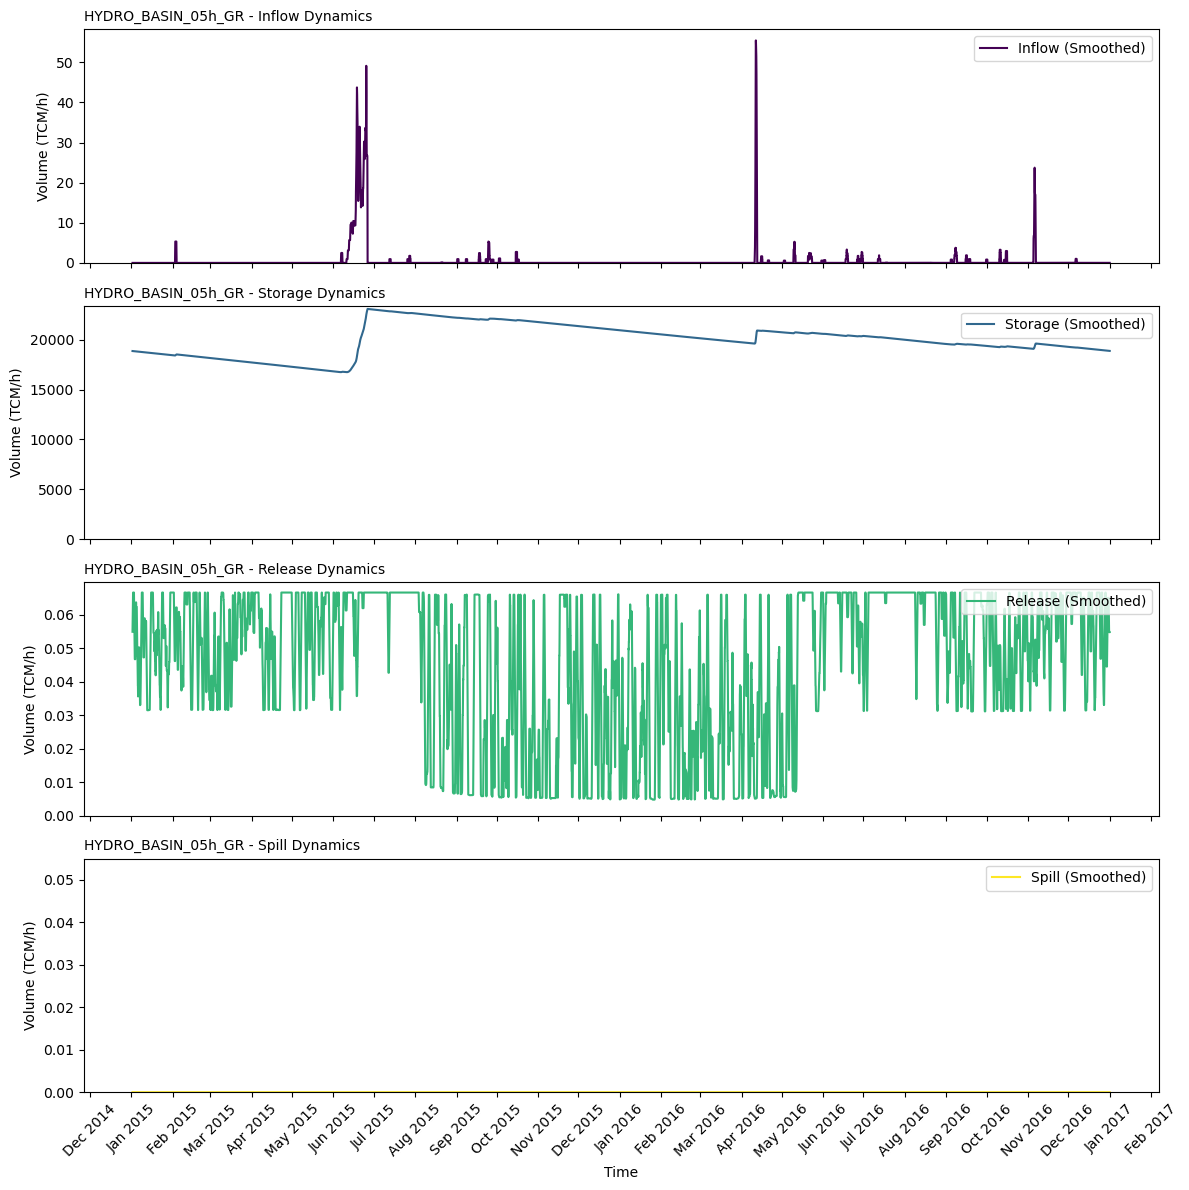

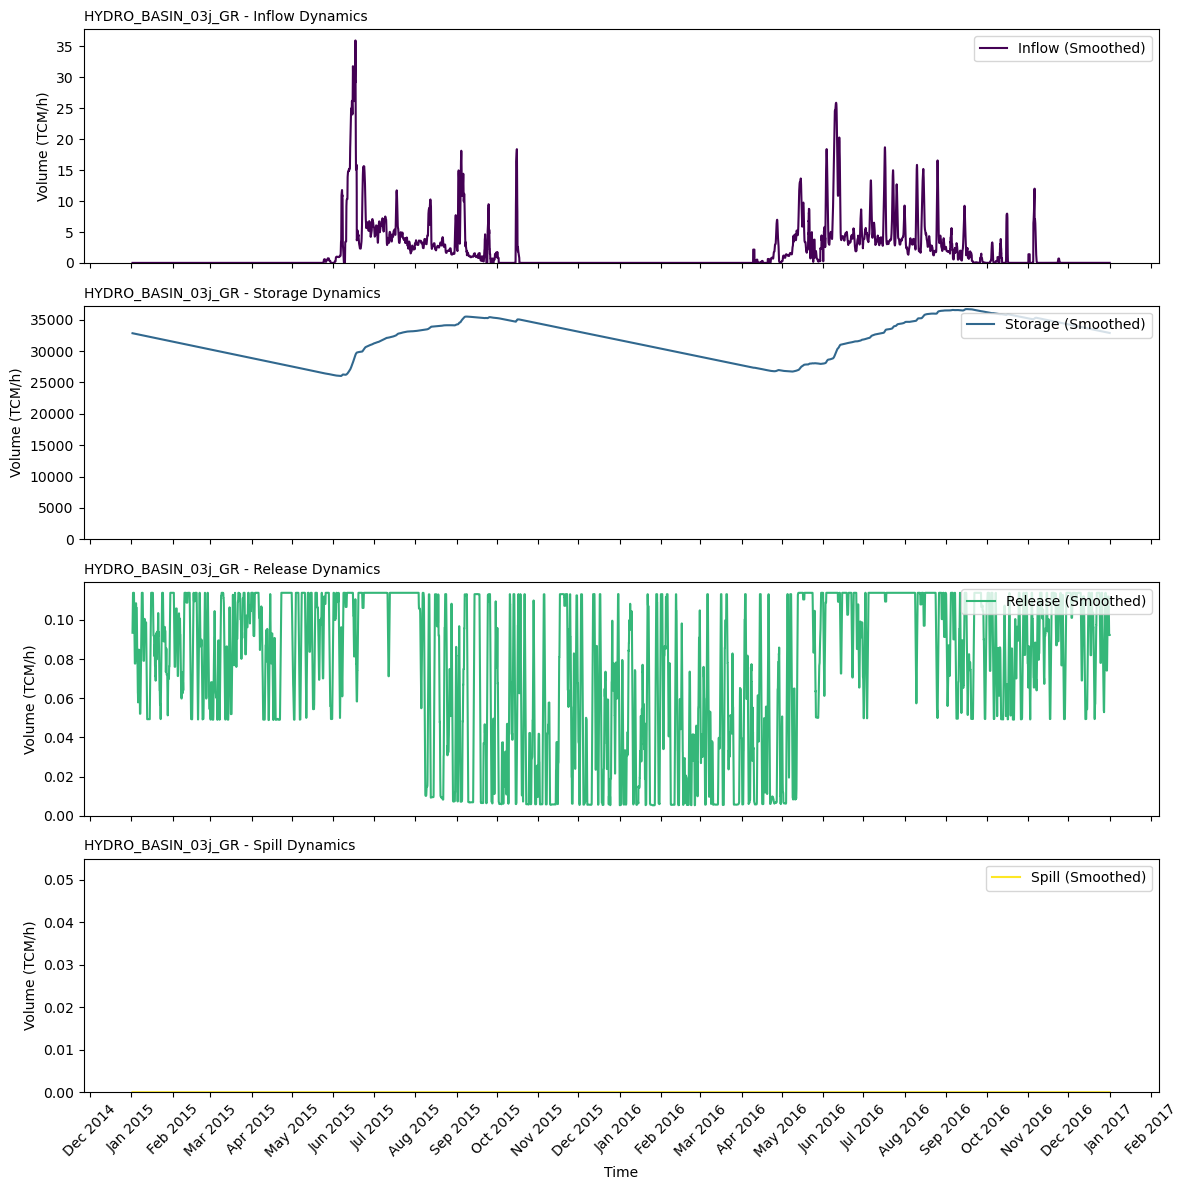

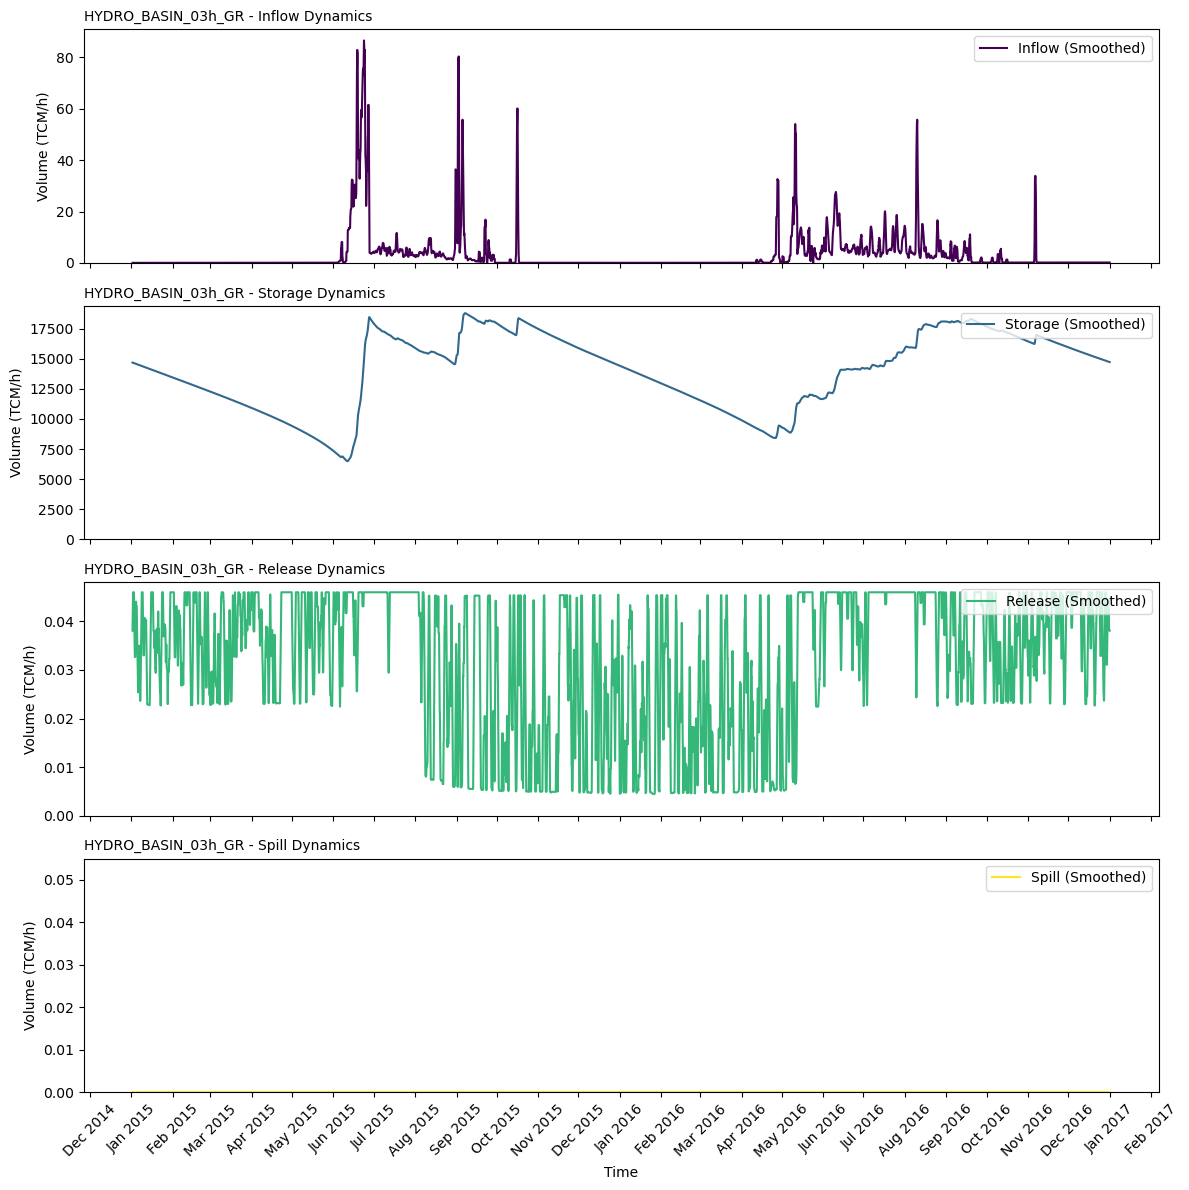

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import re

def plot_basin_dynamics(basins_data, start_date='2015-01-01'):
    # Create date range for the datasets
    date_range = pd.date_range(start=start_date, periods=17544, freq='H')
    
    for basin_name, basin_data in basins_data.items():
        fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
        window_size = 24  # Smooth over 24 hours
        parameters = ['inflow', 'storage', 'release', 'spill']
        colors = plt.cm.viridis(np.linspace(0, 1, 4))

        for idx, parameter in enumerate(parameters):
            data_df = pd.DataFrame(basin_data[parameter], index=date_range, columns=[parameter]).rolling(window=window_size).mean()
            axs[idx].plot(data_df.index, data_df[parameter], color=colors[idx], label=f"{parameter.title()} (Smoothed)")
            axs[idx].set_title(f"{basin_name} - {parameter.title()} Dynamics", fontsize=10, loc='left')
            axs[idx].set_ylabel('Volume (TCM/h)')
            axs[idx].set_ylim(bottom=0)  # Ensure y-axis starts at 0
            axs[idx].legend(loc='upper right')

        # Format x-axis
        axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        axs[3].xaxis.set_major_locator(mdates.MonthLocator())
        plt.xticks(rotation=45)
        plt.xlabel('Time')
        fig.tight_layout()
        plt.show()

# Assuming 'd' is your data object and 'ls_nodes' is a list of all node names
basins_data = {}

# Dynamically determine all hydro basins from ls_nodes
for node_name in ls_nodes:
    if re.match(r'HYDRO_BASIN_\w+_GR$', node_name):
        basins_data[node_name] = {
            'inflow': np.array(getattr(d.model.nodes, node_name).parameters.inflow_series[:17544]),
            'storage': np.array(getattr(d.solution.elements, node_name).variables.storage.values),
            'release': np.array(getattr(d.solution.elements, node_name).variables.release.values),
            'spill': np.array(getattr(d.solution.elements, node_name).variables.spill.values)
        }

plot_basin_dynamics(basins_data)


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_storage_dynamics(battery_data, hydrogen_data, methane_data_src, methane_data_dest, start_date='2015-01-01'):
    # Create date range for the datasets
    date_range = pd.date_range(start=start_date, periods=len(battery_data), freq='H')

    # Create DataFrames
    battery_df = pd.DataFrame(battery_data, index=date_range, columns=['Battery'])
    hydrogen_df = pd.DataFrame(hydrogen_data, index=date_range, columns=['Hydrogen'])
    methane_df_gr = pd.DataFrame(methane_data_src, index=date_range, columns=['Methane'])
    methane_df_be = pd.DataFrame(methane_data_dest, index=date_range, columns=['Methane'])


    # Smooth the data with a rolling mean
    battery_df['Smoothed'] = battery_df['Battery'].rolling(window=24).mean()
    hydrogen_df['Smoothed'] = hydrogen_df['Hydrogen'].rolling(window=24).mean()
    methane_df_gr['Smoothed'] = methane_df_gr['Methane'].rolling(window=24).mean()
    methane_df_be['Smoothed'] = methane_df_be['Methane'].rolling(window=24).mean()

    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

    colors = plt.cm.viridis(np.linspace(0, 1, 4))

    # Plot each storage type
    for ax, df, color, label in zip(axs,
                                    [battery_df, hydrogen_df, methane_df_gr, methane_df_be],
                                    colors,
                                    ['Battery Storage Dynamics', 'Hydrogen Storage Dynamics', 'Liquid Methane Storage Dynamics (Greenland)', 'Liquid Methane Storage Dynamics (Belgium)']):
        ax.fill_between(df.index, df['Smoothed'], color=color)
        ax.set_title(label, fontsize=10, loc='left')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.set_ylabel('GWh')

    # Adjust layout and show plot
    fig.tight_layout()
    plt.show()

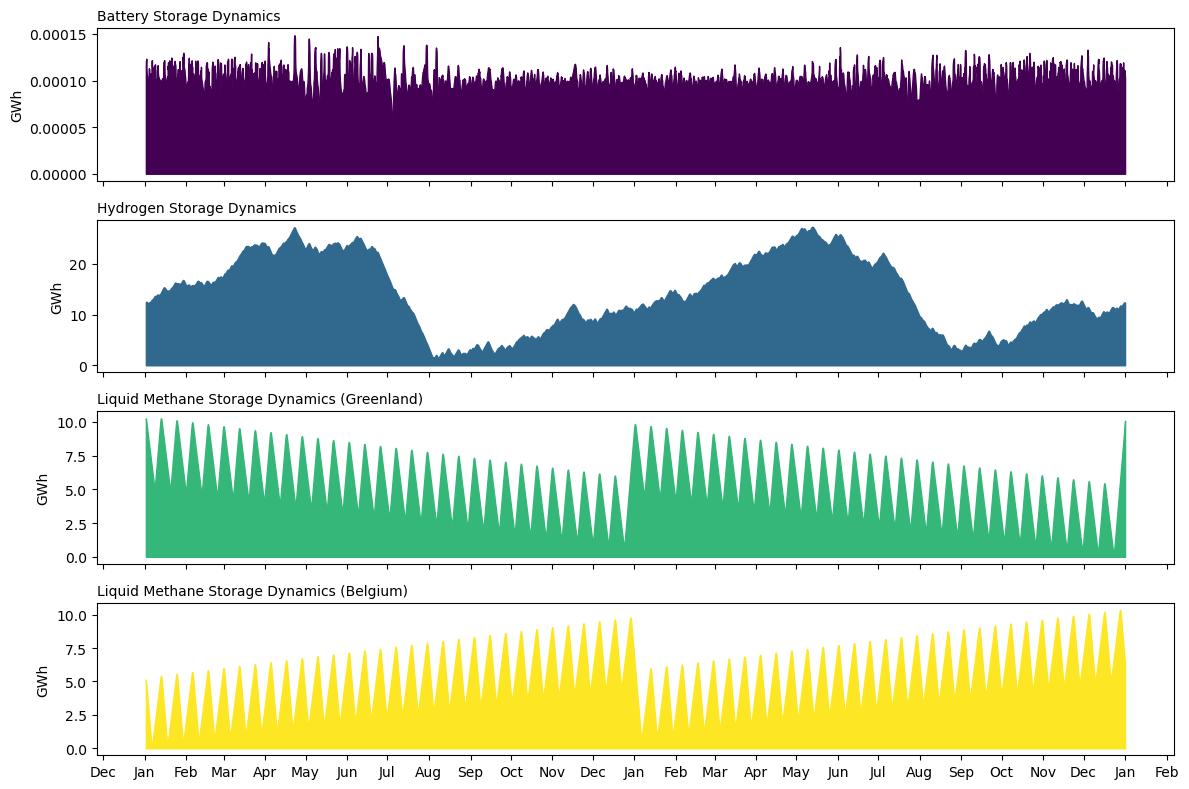

7.625311069124148e-06
12.253978584002176
10.656116891355836
5.715812427130961


In [23]:
battery_flow = np.array(d.solution.elements.BATTERY_STORAGE_GR.variables.electricity_stored.values)
h2_flow = np.array(d.solution.elements.HYDROGEN_STORAGE_GR.variables.hydrogen_stored.values)
lch4_flow_gr = np.array(d.solution.elements.LIQUEFIED_METHANE_STORAGE_HUB_GR.variables.liquefied_methane_stored.values)
lch4_flow_be = np.array(d.solution.elements.LIQUEFIED_METHANE_STORAGE_DESTINATION.variables.liquefied_methane_stored.values)

plot_storage_dynamics(battery_flow, h2_flow, lch4_flow_gr, lch4_flow_be)

print(battery_flow[-1])
print(h2_flow[-1])
print(lch4_flow_gr[-1])
print(lch4_flow_be[-1])

In [24]:
leftover_lch4 = (lch4_flow_be[-1] + lch4_flow_gr[-1]) * 0.98 * 15.31 *1e3

leftover_lch4 # MWh

245641.15310871223

In [25]:
demand_in_mwh = gas_prod * 1e3  # Convert TWh to MWh
total_cost_in_euros = tot_cost * 1e6  # Convert million euros to euros

# Compute price per MWh in euros
price_per_mwh = total_cost_in_euros / (demand_in_mwh+leftover_lch4)

print(f"The price is {round(price_per_mwh, 3)} €/MWh \n")
print("In February 2024, the natural gas price is between 40.2 and 51.5 €/MWh")  # Adjusted to €/MWh
print("This system is about", round((price_per_mwh / 45), 3), "times more expensive compared to a reference price of 45 €/MWh")

The price is 156.91 €/MWh 

In February 2024, the natural gas price is between 40.2 and 51.5 €/MWh
This system is about 3.487 times more expensive compared to a reference price of 45 €/MWh


In [26]:
import calendar

def energy_demand():
    def daily_sum(ts):
        elec = np.array(ts[0])
        elec = elec.reshape((elec.shape[0]//24, 24))
        sum_elec = np.sum(elec, axis=1)
        
        return sum_elec

    df_gas = pd.read_csv("../../data/demand_ng.csv", header=None)

    sum_gas = daily_sum(df_gas)

    years = 2

    month_names = [calendar.month_name[i] for i in range(1, 13)]
    month_names = list(map(lambda x: x + " 2015", month_names)) + list(map(lambda x: x + " 2016", month_names)) + ['']

    # month_names = [calendar.month_name[i] for i in range(1, 13)] * years + [''] # add a placeholder string

    tmp = (sum_gas.shape[0] // 3) * years
    months= [x for x in range(0,tmp)]

    days = [x for x in range(tmp)]

    plt.figure(figsize=(10,8))

    color1, color2 = 'steelblue', 'lightcoral'

    linewidth = 2

    plt.plot([],[], color=color2, label='Gas', linewidth=linewidth)

    plt.stackplot(days, sum_gas[:tmp], colors=[color2], alpha=.7, linewidth=linewidth)

    plt.legend()
    plt.xlim(0, tmp)
    freq = 4
    plt.xticks(months[::30*freq], month_names[::freq], rotation=0)

    plt.ylabel('Energy demand [GWh/day]')

    plt.axhline(color='black', linewidth=1)

    plt.show()

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (7).

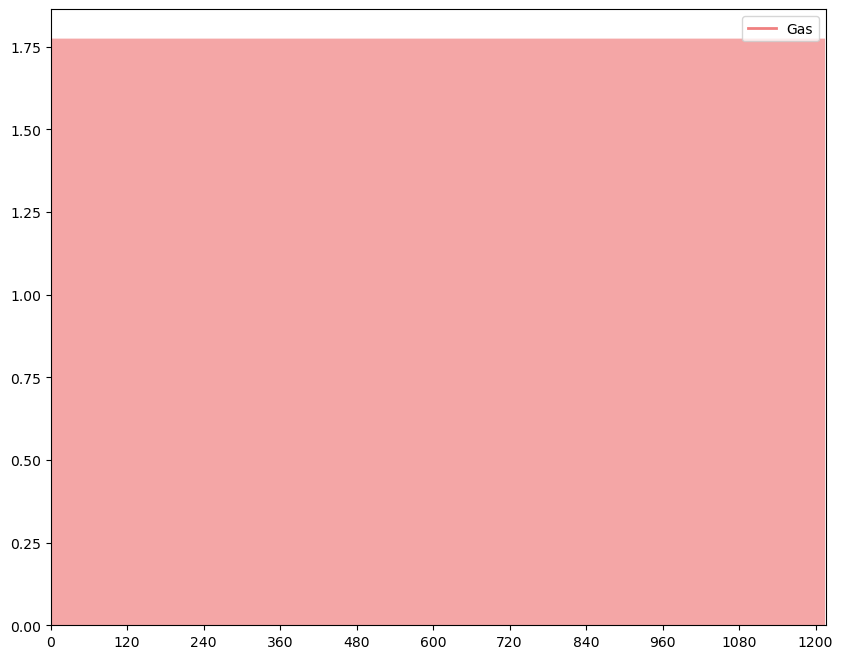

In [27]:
energy_demand()